In [1]:
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [13., 9.]

In [87]:
from sklearn.metrics import r2_score


ls1 = [0.90,
0.92,
0.92,
0.96,
0.98,
0.97,
0.96,
0.99,
1.02,
1.07,
1.12,
1.19,
1.31,
1.43,
1.39,
1.47,
1.59,
1.59,
1.72,
1.78,
1.82]

ls2 = [0.88,
0.91,
0.95,
0.98,
1.02,
1.05,
1.09,
1.13,
1.16,
1.20,
1.23,
1.27,
1.30,
1.34,
1.37,
1.41,
1.44,
1.48,
1.51,
1.55,
1.58]

r2_score(ls1, ls2)

0.8481967588944134

In [86]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a :math:`R^2` score of 0.0.
    
    Read more in the :ref:`User Guide <r2_score>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    multioutput : {'raw_values', 'uniform_average', 'variance_weighted'},             array-like of shape (n_o

### Вступление
В данной работе были рассмотрены алгоритмы для решения одной задачи частичной реконсрукции 3D-сцены по изображению. 

На сегодняшний день большое количество задач компьютерного зрения решается в области дополненной или виртуальной реальности. Одна из таких задач $-$ это частичное восстановление 3D-сцены по снимкам, т.е. на входе у алгоритма имеется какое-либо изображение или набор изображений и требуется построить 3D-облако точек, которе бы описывало изображение или интересующую часть этого изображения (в основном за такие части принимаются какие-либо плоские объекты $-$ стены, мебель, дорога, здания и т.д.). В дальнейшем это используется уже внутри AR/VR движков для размещения объектов виртуальной или дополненной реальности на этих восстановленных частях. Пример - на картинке снизу.



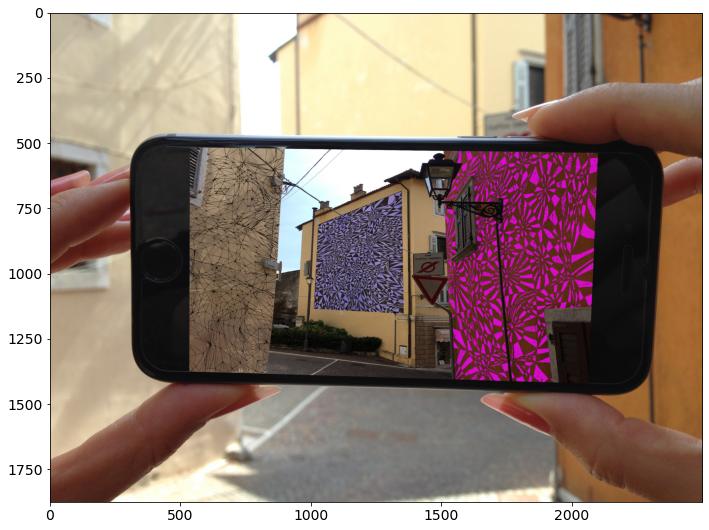

In [10]:
plt.imshow(cv2.cvtColor(cv2.imread("media/ar_example.png"), cv2.COLOR_BGR2RGB));

Особенностью работы является то, что в качестве исходных данных использованы фотографии с улицы. Дело в том, что есть аналогичная задача для помещений, и ключевое отличие данных задач состоит в том, что у задачи в помещении есть готовые датасеты с размеченными плоскоятми и другими данными (пример - на картинке). В связи с этим, для задач в помещении можно использовать модели и методы, которые непосредственно решают данную задачу (можно, например, рассмотреть задачу попиксельной классификации или что-то другое).

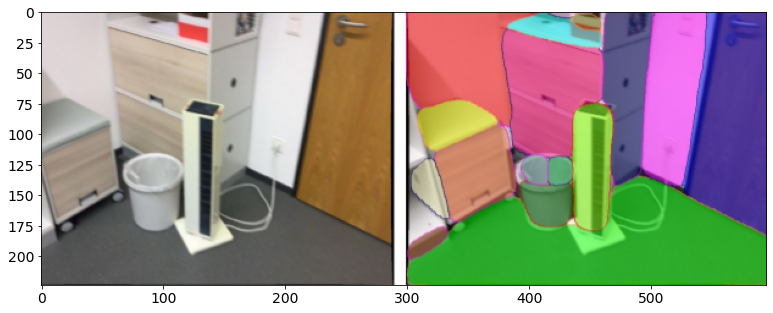

In [11]:
plt.imshow(cv2.cvtColor(cv2.imread("media/indoor.png"), cv2.COLOR_BGR2RGB));

Ниже приведен краткий обзор моделей, которые подходят для непосредственного решения задачи:
### PlaneNet 
[Ссылка на статью](https://arxiv.org/pdf/1804.06278.pdf)

Особенности:
1. Первая end-to-end модель на нейронных сетях для сегментации плоскостей на изображении.
2. Возвращает карту глубины и ориентацию плоскостей.
3. Основное ограничения
    1. Максимальное кол-во плоскотей является гиперпараметром модели.
    2. Плохо справляется с шумными изображениями и с малыми поверхностями.
4. Обучение и тестирование проводилось на ScanNet и NYUv2 датасетах.
5. Реализованная авторами модель написана на втором питоне. [repo](https://github.com/art-programmer/PlaneNet)
6. Слабая обощающая способоность (согласно [данной статье](https://arxiv.org/pdf/1812.04072.pdf)).

### PlaneRecover 
[Ссылка на статью](https://openaccess.thecvf.com/content_ECCV_2018/papers/Fengting_Yang_Recovering_3D_Planes_ECCV_2018_paper.pdf)

Особенности:
1. Модель основана на архитектуре _fully convolutional network (FCN)_.
2. По заявлениям авторов предоставляет real-time скорость обработки. (60 FPS на 1080 TI)
3. Для обучения не нужны изображения с размеченными плоскостями и их параметрами, т.е. задача сведена к обучению карты глубины изображений.
4. Есть ограничение в максимальное количество детектируемых на уровне 5 штук.
5. В качестве обучающего датасета использован SYNTHIA - синтетический датасет на основе Unity.
6. Довольно хорошо показывает себя на изображениях с улицы. 
7. Есть реализация от авторов, правда на Python2. [repo](https://github.com/fuy34/planerecover)

### PlaneRCNN 
[Ссылка на статью](https://arxiv.org/pdf/1812.04072.pdf)

Особенности:
1. Убрано ограничение на количество распознаваемых плоскостей на изображении.
2. Основано на Mask R-CNN (вместо детектирования отдельных объектов настраивается на детектирование плоскость/не плоскость).
3. Добольно сложная и многоступенчатая архитектура сети. 
4. Есть репо от создателей на Python3, но с запуском пока не вышло. [repo](https://github.com/NVlabs/planercnn)
5. Достаточно интересные примеры есть работы с данными с улицы, а не внутреннего помещения.
6. Обучались все также на ScanNet и NYUv2.
7. Есть описание железа, которое использовалось при построении сети.

### Associative Embeddings 
[Ссылка на статью](https://arxiv.org/pdf/1902.09777.pdf)

Хорошо восстанавливает плоскости на картинках помещений. 
Нет тех заявленных скоростей, которые написаны в статье (вместо 32 FPS получается 0.25 FPS)
Поскольку изначально там используется модель, которая обучалась на данных ScanNet, то для лучшего восттановления 
информации с улицы есть идея заново обучить модель на датасетах типа KITTI или SYNTHIA.

Особенности:
1. На момент апреля 2019 года - SOTA решение в своей области.
2. Все те же датасеты (ScanNet - 256 x 192, NYUv2 - 640 x 480).
3. Использована интересная идея: обучение эмбеддингов, которые отображают пиксели с одной плоскости в близкие точки (в один кластер).
4. Предложен оптимизированный алгоритм кластеризации эмбеддингов.
5. Есть упоминания методов построения обучающей выборки с помощью одной из модификаций RANSAC.
6. Нет ограничений на максимальное количество плоскотей, содержащихся на изображении. 
7. Возможно применение в реалтайме (по данным из статьи видно, что модель работает со скоростью 32 FPS). Интересно проверить скорость на изображениях с большим разрешением.
8. Возвращает карту глубины и ориентацию плоскостей. 
9. Описаны технические мощности, на которых авторы проверяли свои наработки.
10. Есть авторская реализация на Python3. [repo](https://github.com/svip-lab/PlanarReconstruction)

После изучения возможных подходов и моделей был предложено (ввиду отсутствия нужных данных для работы стандартных моделей) декомпозировать задачу на несколько более мелких и понятных частей, которые уже возможно решать более широким спектром методов без применения непосредственных данных для обучения. Были выделены следующие подзадачи:
1. Сегментация изображения. 
2. Получение информации о нахождении точек относительно камеры.
3. Построение плоскостей статистическими методами из полученных облаков точек. 

Сегментирование изображения нужно для того, чтобы выделить на снимке интересующие нас объекты $-$ здания, стены, дороги (или, наоборот, убрать ненужные). Далее с помощью уже другой модели получается какая-либо информация о точках относительно камеры. Это могут быть разные данные и от этого зависит реализация третьей части, но в нашем случае получается относительная глубина пикселей (английское название задачи $-$ Depth Estimation). Можно, к примеру, получать информацию о направлении нормали вектора в данной точке, а не глубину, но такая задача более специфичная и еще не так хорошо решается, как оценка глубины.  
Третья подзадача решается с помощью алгоритма [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus). Он подходит в тех случаях, когда среди данных очень много шумов (это именно наш случай, поскольку все, что не принадлежит какой-то плосксоти $-$ шум). 

Стоит отметить, что дополнительным требованием в задаче является быстродействие модели, т.е. она должна работать приближенно к реальному времени. В связи с этим большая часть моделей была отсеяна. В итоге выбор пал на 2 из них: [HarDNet](https://arxiv.org/abs/1909.00948) и [MiDaS](https://arxiv.org/abs/1907.01341). Первая для сегментации, вторая $-$ для оценки глубины. Обе модели показывают хорошее качество на своих задачах (для сегментации - почти SOTA, для глубины - SOTA (если рассматривать monocular depth)). 

Схема решения представлена ниже.

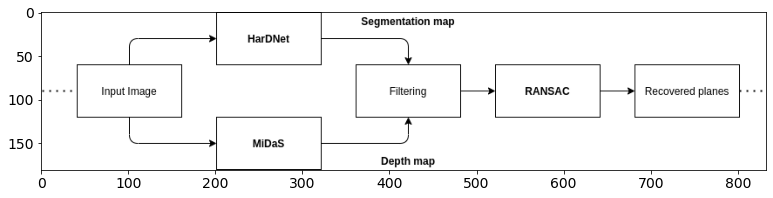

In [12]:
plt.imshow(cv2.cvtColor(cv2.imread("media/schema.png"), cv2.COLOR_BGR2RGB));

### Проблемы, возникшие при реализации

В ходе экспериментов было выявлено слабое звено модели. Им оказалась сегментация. Проблема возникла из-за того, что большинство датасетов для сегментации (уличных) заточены под задачи для self-driving машин, и, следовательно, на снимках в таких датасетах в основном дорога, автомобили и мало зданий, стен, тратуаров и прочего $-$ все то, что встречается у человека на пути по улице. Проблема наглядно.

##### **Исходное изображение**

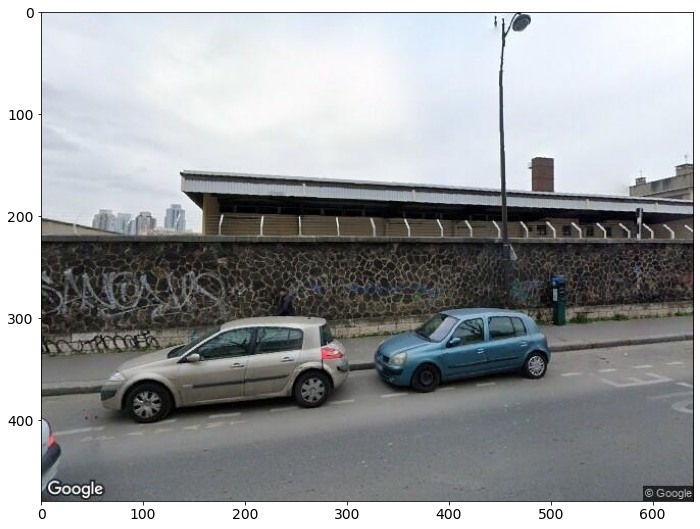

In [13]:
plt.imshow(cv2.cvtColor(cv2.imread("media/segm_example.jpg"), cv2.COLOR_BGR2RGB));

##### **Сегментация (обучено только на Cityscapes)**

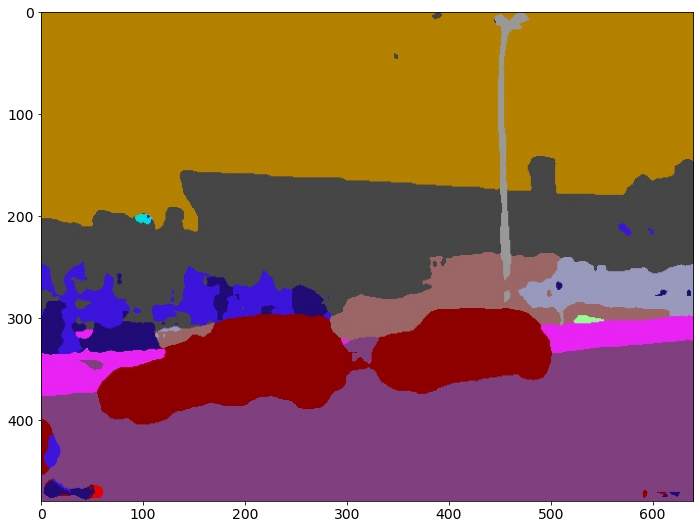

In [14]:
plt.imshow(cv2.cvtColor(cv2.imread("media/bad_segm.jpg"), cv2.COLOR_BGR2RGB));

##### **Сегментация (Дообучено на смеси Cityscapes + Vistas)**

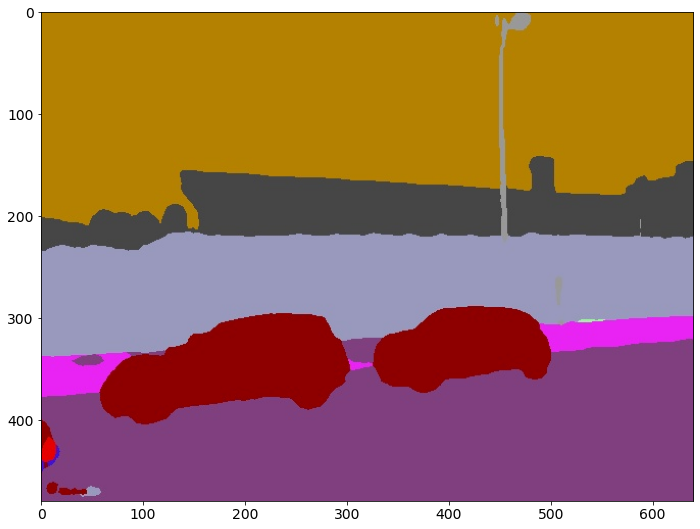

In [15]:
plt.imshow(cv2.cvtColor(cv2.imread("media/good_segment.jpg"), cv2.COLOR_BGR2RGB));

Решить проблему с сегментацией удалось использованием более богатого датасета (Vistas). К сожалению, у него закрытая лицензия и просто так ссылку на него приложить нельзя. У него гораздо больше классов (65 против 19 у Cityscapes), поэтому пришлось вручную на основе здравого смысла сливать некоторые классы в один. Результат дообучения видно сверху. Версия обученной модели лежит в папке `models_pretrained`. 

### Пример работы

Рассмотрим то, как можно с помощью модели построить частичную 3D-сцену для какого-то изображения с улицы.


In [2]:
# инициализация моделей
from models.hardnet_segm import HardNetSegm
import cv2
import torch
from tqdm import tqdm_notebook

from models.bts_estimator import BTSEstimator
from plane_detector import PlaneDetector
from models.midas_estimator import MIDASEstimator
from ransac_detector import *
from process_utils import *


hardnet_path = "models_pretrained/hardnet_alter_checkpoint.pkl"

depth_model = MIDASEstimator()
segm_model = HardNetSegm(hardnet_path)

model = PlaneDetector(depth_model, segm_model)

Using cache found in /Users/ruslanomarov/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/ruslanomarov/.cache/torch/hub/facebookresearch_WSL-Images_master


Loading weights:  None


Using cache found in /Users/ruslanomarov/.cache/torch/hub/intel-isl_MiDaS_master


In [3]:
"""Utils for monoDepth.
"""
import sys
import re
import numpy as np
import cv2
import torch

from PIL import Image



def get_mask_pallete(npimg, dataset='detail'):
    """Get image color pallete for visualizing masks"""
    # recovery boundary
    if dataset == 'pascal_voc':
        npimg[npimg==21] = 255
    # put colormap
    out_img = Image.fromarray(npimg.squeeze().astype('uint8'))
    if dataset == 'ade20k':
        out_img.putpalette(adepallete)
    elif dataset == 'citys':
        out_img.putpalette(citypallete)
    elif dataset in ('detail', 'pascal_voc', 'pascal_aug'):
        out_img.putpalette(vocpallete)
    return out_img

def read_pfm(path):
    """Read pfm file.

    Args:
        path (str): path to file

    Returns:
        tuple: (data, scale)
    """
    with open(path, "rb") as file:

        color = None
        width = None
        height = None
        scale = None
        endian = None

        header = file.readline().rstrip()
        if header.decode("ascii") == "PF":
            color = True
        elif header.decode("ascii") == "Pf":
            color = False
        else:
            raise Exception("Not a PFM file: " + path)

        dim_match = re.match(r"^(\d+)\s(\d+)\s$", file.readline().decode("ascii"))
        if dim_match:
            width, height = list(map(int, dim_match.groups()))
        else:
            raise Exception("Malformed PFM header.")

        scale = float(file.readline().decode("ascii").rstrip())
        if scale < 0:
            # little-endian
            endian = "<"
            scale = -scale
        else:
            # big-endian
            endian = ">"

        data = np.fromfile(file, endian + "f")
        shape = (height, width, 3) if color else (height, width)

        data = np.reshape(data, shape)
        data = np.flipud(data)

        return data, scale




path = '/Users/ruslanomarov/work/DPT/output_monodepth/test_corner2.pfm'

In [5]:
depth_map, _ = read_pfm(path)

In [3]:
# img = cv2.imread("test_corner2.jpg")
img = cv2.imread('paris_50.png')
img = cv2.resize(img, (640, 480))


In [4]:
# построение карты глубины, сегментации и набора масок интересующих областей 
# (для примера здесь 2 набора - дорога и тратуар (0 и 1) и здания (2))
depth_map, seg_map, ls_map_arr = model.get_segmented_depth(img, [{0, 1}, {2}])
# depth_map, _ = read_pfm(path)
# depth_map = cv2.resize(depth_map, (640, 480))

In [5]:
# фильтрация и получение более ровных областей
ls_right_depths = []
ls_tmp = []
funcs = [thr_func(0.95), np.mean]
for item, fun in zip(ls_map_arr, funcs):
    tmp, k = crop_depth_map(depth_map * item, fun)
    ans = get_connected_components(tmp, threshold=0.3)
#     for item, _ in ans:
#         item[item >= 50] = np.inf
    ls_right_depths.extend(ans)

In [6]:
max(1 / depth_map.flatten())

0.0013018908

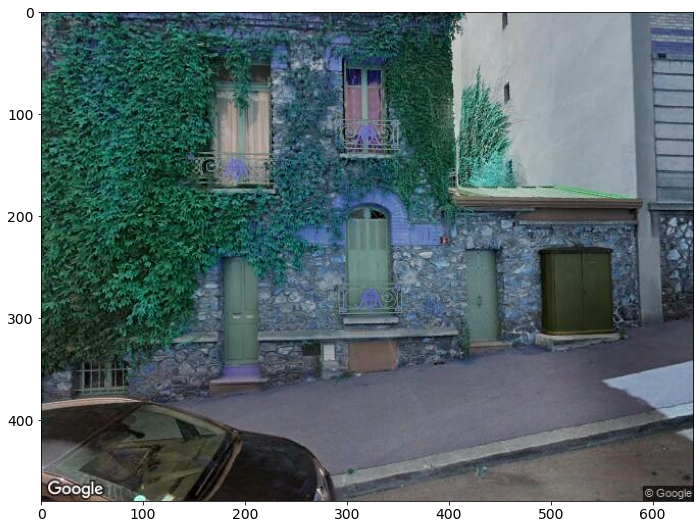

In [7]:
plt.imshow(img);

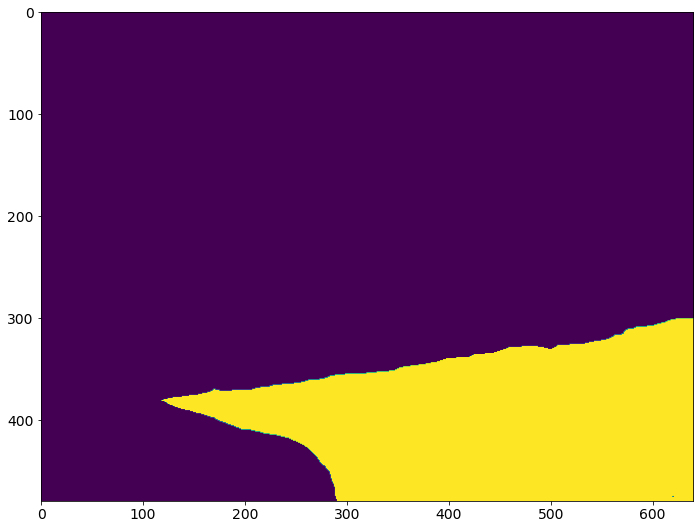

In [8]:
# дорога
plt.imshow(ls_map_arr[0]);

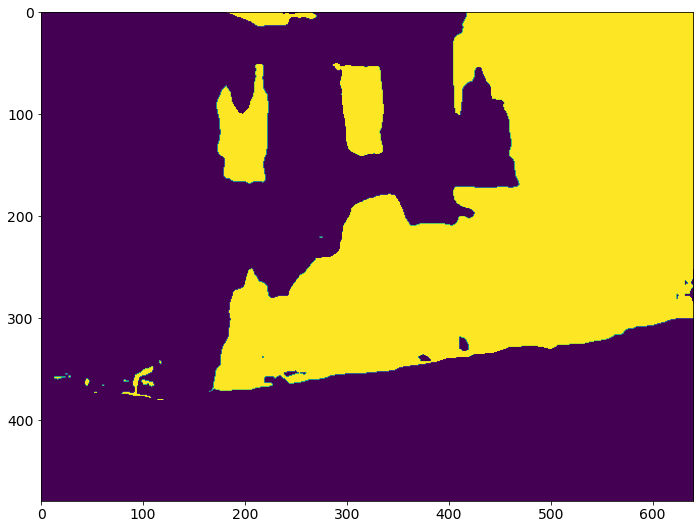

In [9]:
# здание
plt.imshow(ls_map_arr[1]);

In [10]:
# для визуализации используем небольшой питоновский трюк
import open3d as o3d
import sys
import os
# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

Извлечение плоскостей, получение их векторов нормали и бинарных масок пикселей

In [11]:
%%time
ls_right_map_arrs = [np.where(item[0] > 0, 1, 0) for item in ls_right_depths]
ls_maps_planes = []
ls_vectors_planes = []
for dd, map_arr in zip(ls_right_depths, ls_right_map_arrs):
    result = extract_planes_con(map_arr, dd[0], map_arr.sum(), 0.2)
    ls_maps_planes.extend([arr for arr, _ in result])
    ls_vectors_planes.extend([arr for _, arr in result])

CPU times: user 43.6 ms, sys: 5.66 ms, total: 49.3 ms
Wall time: 48 ms


In [12]:
# один вектор направлен по оси OY, а два других почти перпендикулярны
ls_vectors_planes

[array([1.13336388e-02, 9.99752700e-01, 1.91334038e-02, 1.67967347e-04]),
 array([5.77216667e-01, 1.81633498e-01, 7.96134531e-01, 6.42825306e-04])]

In [13]:
color = o3d.io.read_image("/Users/ruslanomarov/work/plane_reconstructor/test_corner2.jpg")

In [56]:
!pwd

/usr/local/Cellar/python@3.8/3.8.9/Frameworks/Python.framework/Versions/3.8/Resources/Python.app/Contents/Resources


In [60]:
np.float32((1 / depth_map) * item).shape

(480, 640)

In [14]:
img1 = img.copy()
ls_pcd = []
for item, (a, b, c, d) in zip(ls_maps_planes, ls_vectors_planes):
    tmp = o3d.geometry.Image(np.float32((1 / depth_map) * item))
    tt = o3d.geometry.PointCloud.create_from_depth_image(tmp, DEFAULT_CAM, depth_scale=1.0)
    tt.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
    tt.paint_uniform_color([random.uniform(0, 1) for _ in range(3)])
    
    ls_pcd.append(tt)

    indeces = np.argwhere(item)
    color = [random.randint(1, 255) for _ in range(3)]
    for i, j in indeces:
        img1[i][j] = color

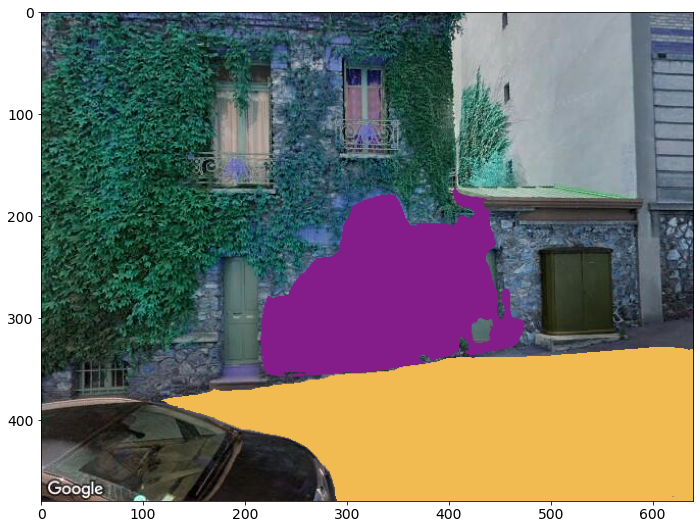

In [15]:
plt.imshow(img1);

In [16]:
# здесь можно посмотреть в 3D облака точек, которые получаются и плоскости построенные
ls_new_pcd = [straight_pcd(close_map(map_arr), 1 / depth_map, plane) for map_arr, plane in zip(ls_maps_planes, ls_vectors_planes)]

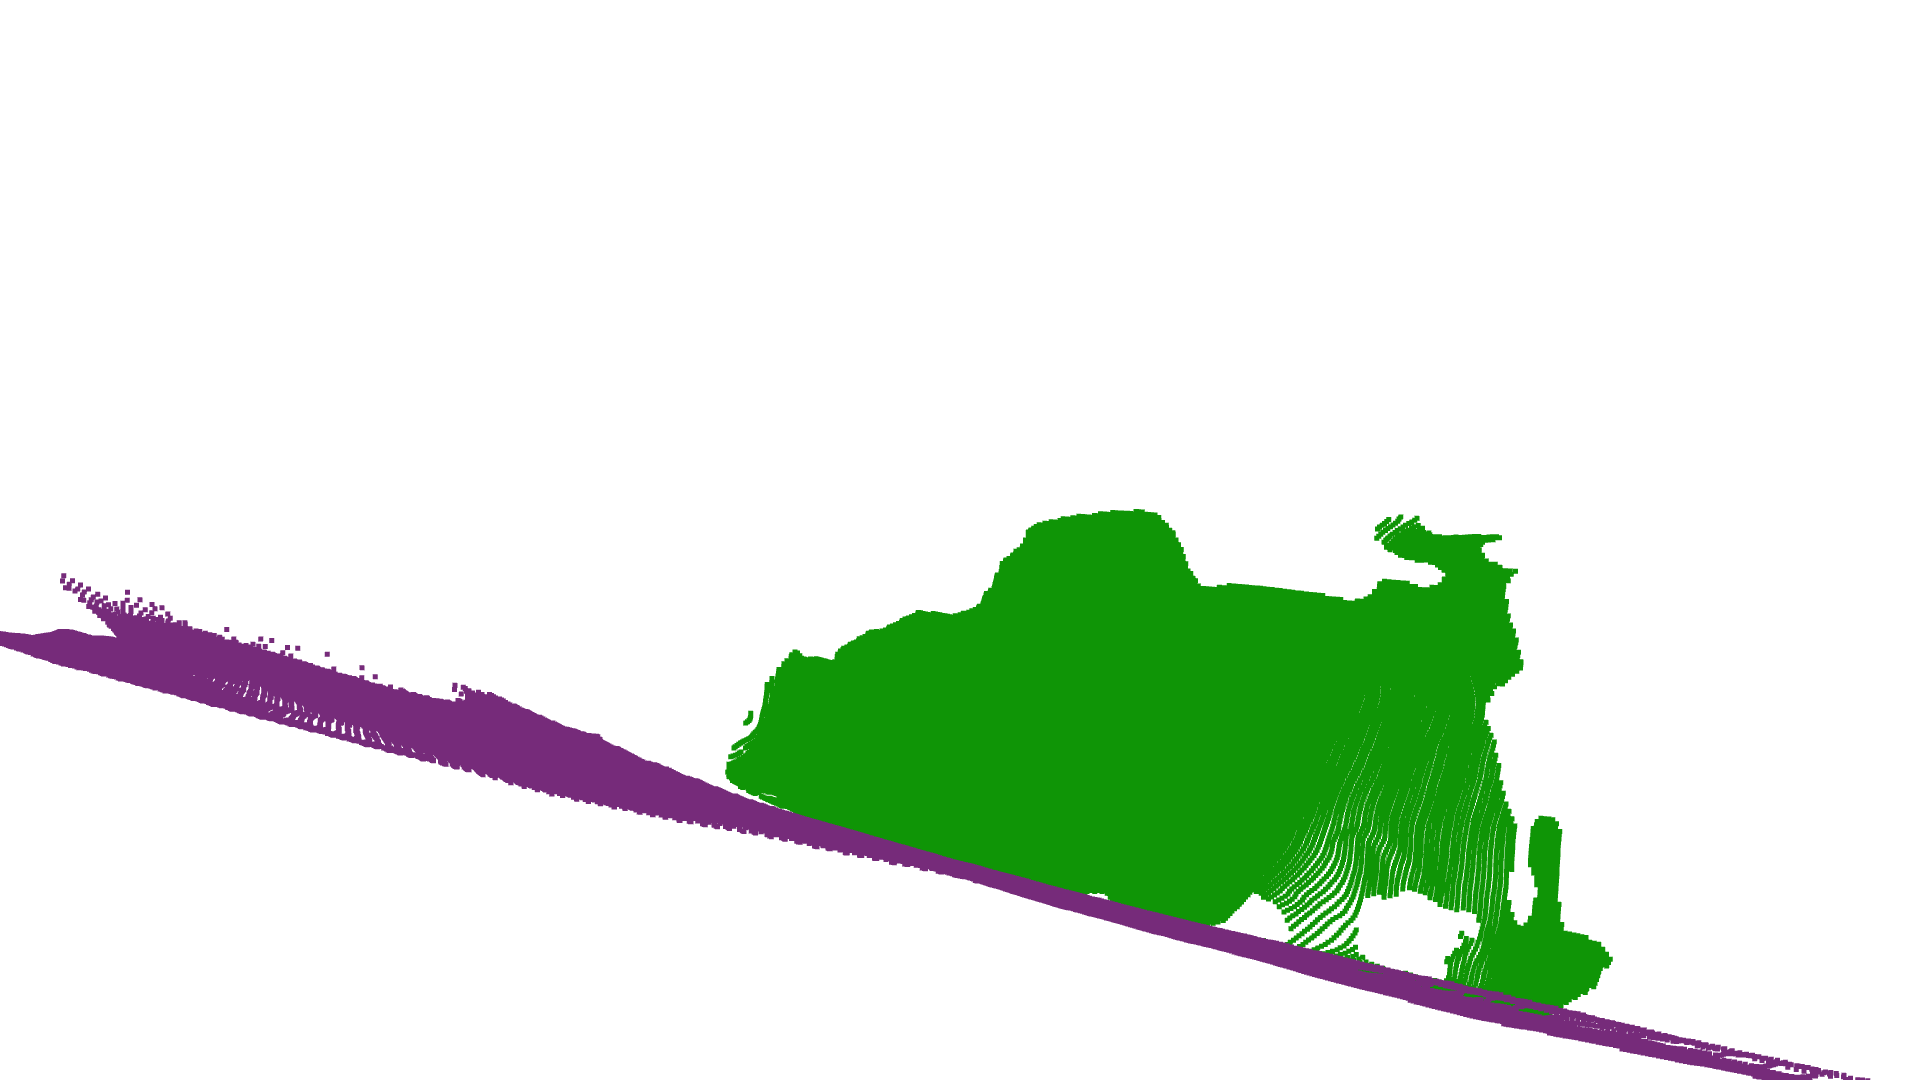

In [17]:
ls_new_pcd.extend(ls_pcd)
o3d.visualization.draw_geometries(ls_pcd, zoom=0.35)

Моноцветами обозначены различные части облаков точек, у которых удалось выделить плоскости, соответствующие разным векторам нормали. 
Градиентом выделены плосксоти, которым принадлежат точки

In [142]:
from models.hardnet_segm import HardNetSegm
import cv2
import torch
from tqdm import tqdm_notebook

from models.bts_estimator import BTSEstimator
from plane_detector import PlaneDetector
from models.midas_estimator import MIDASEstimator
# from ransac_detector import *
# from process_utils import *


hardnet_path = "models_pretrained/hardnet_alter_checkpoint.pkl"

depth_model = MIDASEstimator()
segm_model = HardNetSegm(hardnet_path)

model = PlaneDetector(depth_model, segm_model)

Using cache found in /Users/ruslanomarov/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /Users/ruslanomarov/.cache/torch/hub/facebookresearch_WSL-Images_master


Loading weights:  None


Using cache found in /Users/ruslanomarov/.cache/torch/hub/intel-isl_MiDaS_master


In [42]:
img = cv2.imread("test_corner2.jpg")
img = cv2.resize(img, (640, 480))



In [43]:
from models.hardnet_segm import save_pred, get_palette


preds = segm_model.segment(img)

In [44]:
preds.shape

(480, 640)

In [45]:
import numpy as np

arr = np.array([preds.astype(np.uint8)])
arr.shape

(1, 480, 640)

In [116]:
from PIL import Image
import os


ignore_label = -1
label_mapping = {-1: ignore_label, 0: ignore_label, 
                              1: ignore_label, 2: ignore_label, 
                              3: ignore_label, 4: ignore_label, 
                              5: ignore_label, 6: ignore_label, 
                              7: 0, 8: 1, 9: ignore_label, 
                              10: ignore_label, 11: 2, 12: 3, 
                              13: 4, 14: ignore_label, 15: ignore_label, 
                              16: ignore_label, 17: 5, 18: ignore_label, 
                              19: 6, 20: 7, 21: 8, 22: 9, 23: 10, 24: 11,
                              25: 12, 26: 13, 27: 14, 28: 15, 
                              29: ignore_label, 30: ignore_label, 
                              31: 16, 32: 17, 33: 18}


def convert_label(label, inverse=False):
    temp = label.copy()
    if inverse:
        for v, k in label_mapping.items():
            label[temp == k] = v
    else:
        for k, v in label_mapping.items():
            label[temp == k] = v
    return label

def save_pred(preds, sv_path, name):
    palette = get_palette(256)
    # preds = np.asarray(np.argmax(preds, axis=1), dtype=np.uint8)
    for i in range(preds.shape[0]):
        pred = convert_label(preds[i], inverse=True)
        pred = preds[i]
        save_img = Image.fromarray(pred)
        print(save_img)
        save_img.putpalette(palette)
        save_img.save(os.path.join(sv_path, name[i] + '.png'))

In [64]:
path = '/Users/ruslanomarov/Downloads/google_examples_normal/'

files = os.listdir(path)

cityscapes = '/Users/ruslanomarov/Downloads/ddr23_slim_cityscapes_examples/'

files_city = os.listdir(cityscapes)
fn_city = lambda x: "_".join(x.split('_')[:3]) + '_leftImg8bit.png'

dist_cityscapes = '/Users/ruslanomarov/Downloads/leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/'

In [67]:
for item in map(fn_city, files_city):
    print(item)
    img = cv2.imread(dist_cityscapes + item)
    img = cv2.resize(img, (640, 480))
    
    preds = segm_model.segment(img)
    
    save_pred(np.array([preds.astype(np.uint8)]), 'output_cityscapes_hardnet', [item.split('.')[0]])




frankfurt_000000_000576_leftImg8bit.png
<PIL.Image.Image image mode=L size=640x480 at 0x14796F040>
frankfurt_000000_001016_leftImg8bit.png
<PIL.Image.Image image mode=L size=640x480 at 0x14796F040>
frankfurt_000000_000294_leftImg8bit.png
<PIL.Image.Image image mode=L size=640x480 at 0x14796F040>
frankfurt_000000_001751_leftImg8bit.png
<PIL.Image.Image image mode=L size=640x480 at 0x14796F040>
frankfurt_000000_001236_leftImg8bit.png
<PIL.Image.Image image mode=L size=640x480 at 0x14796F040>


In [24]:
save_pred(arr, '', ['test'])

<PIL.Image.Image image mode=L size=640x480 at 0x109C140A0>


### Cityscapes img

In [123]:
norm_path = '/Users/ruslanomarov/Downloads/leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/'
gt_path = '/Users/ruslanomarov/work/plane_reconstructor/gt_cityscapes/'
ddrs_path = '/Users/ruslanomarov/Downloads/ddr23_slim_cityscapes_examples/'
ddr_path = '/Users/ruslanomarov/Downloads/ddr23_cityscapes_examples/'
hard_path = '/Users/ruslanomarov/work/plane_reconstructor/output_cityscapes_hardnet/'


ls_normal = list(map(fn_city, files_city))
ls_gt = os.listdir(ddrs_path)

res_images = []
for i in range(len(ls_normal)):
    img_gt = cv2.cvtColor(cv2.imread(gt_path + ls_gt[i]), cv2.COLOR_RGB2BGR)
    img_gt = cv2.resize(img_gt, (200, 200))
    
    img_n = cv2.cvtColor(cv2.imread(norm_path + ls_normal[i]), cv2.COLOR_RGB2BGR)
    img_n = cv2.resize(img_n, (200, 200))
    
#     palette = get_palette(256)
#     # preds = np.asarray(np.argmax(preds, axis=1), dtype=np.uint8)
#     pred = convert_label(img_gt[:, :, 0], inverse=False)
#     save_img = Image.fromarray(pred)
#     save_img.putpalette(palette)
    
    
#     img_gt = np.array(save_img)
#     print(img_gt)
    
    img_ddr = cv2.cvtColor(cv2.imread(ddr_path + ls_gt[i]), cv2.COLOR_RGB2BGR)
    img_ddr = cv2.resize(img_ddr, (200, 200))
    
    img_ddrs = cv2.cvtColor(cv2.imread(ddrs_path + ls_gt[i]), cv2.COLOR_RGB2BGR)
    img_ddrs = cv2.resize(img_ddrs, (200, 200))
    
    img_hard = cv2.cvtColor(cv2.imread(hard_path + ls_normal[i]), cv2.COLOR_RGB2BGR)
    img_hard = cv2.resize(img_hard, (200, 200))
    
    res_images.append(np.hstack([img_n, img_gt, img_ddr, img_ddrs, img_hard]))

In [121]:
_gt_path = '/Users/ruslanomarov/Downloads/gtFine_trainvaltest/gtFine/val/frankfurt/'

In [122]:
for i in range(len(ls_normal)):
    img_gt = cv2.imread(_gt_path + ls_gt[i])
    img_gt = cv2.resize(img_gt, (200, 200))
    
    save_pred(np.array([img_gt[:, :, 0]]), 'gt_cityscapes', [ls_gt[i].split('.')[0]])

<PIL.Image.Image image mode=L size=200x200 at 0x149AAC5B0>
<PIL.Image.Image image mode=L size=200x200 at 0x149AAC5B0>
<PIL.Image.Image image mode=L size=200x200 at 0x149AAC5B0>
<PIL.Image.Image image mode=L size=200x200 at 0x149AAC5B0>
<PIL.Image.Image image mode=L size=200x200 at 0x149AAC5B0>


In [99]:
!pwd

/Users/ruslanomarov/work/plane_reconstructor


In [85]:
img_gt[:, :, 0]

array([[ 3,  3,  3, ...,  3,  3,  3],
       [ 3,  2, 21, ...,  2,  2,  2],
       [ 3,  2, 21, ...,  2,  2,  2],
       ...,
       [ 3,  2,  2, ...,  1,  1,  2],
       [ 3,  2,  2, ...,  1,  1,  2],
       [ 3,  3,  3, ...,  3,  3,  3]], dtype=uint8)

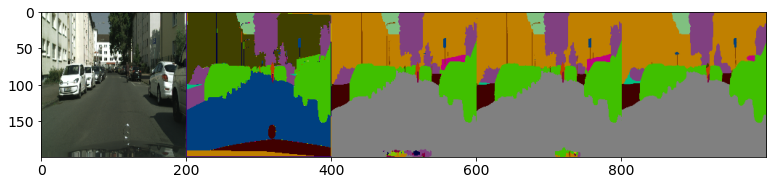

In [124]:
import matplotlib.pyplot as plt

import cv2 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 12.
plt.rcParams["figure.figsize"] = [13., 9.]

plt.imshow(res_images[0])

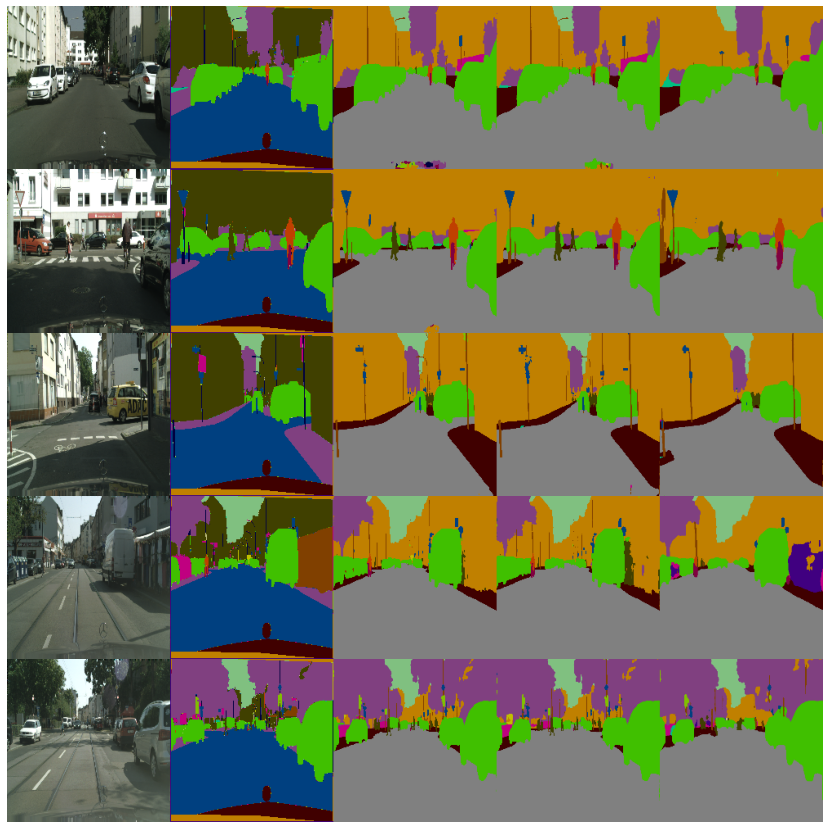

In [136]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(5, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].imshow(res_images[0])
axs[1].imshow(res_images[1])
axs[2].imshow(res_images[2])
axs[3].imshow(res_images[3])
axs[4].imshow(res_images[4])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
    ax.axis('off')

In [137]:
fig.savefig("cityscapes_all.png", bbox_inches='tight')

### Google

In [4]:
import os

path = '/Users/ruslanomarov/Downloads/google_examples_normal/'

files = os.listdir(path)

google = '/Users/ruslanomarov/Downloads/ddr23_google_normal_examples/'

files_g = os.listdir(google)
# fn_city = lambda x: "_".join(x.split('_')[:3]) + '_leftImg8bit.png'

# dist_cityscapes = '/Users/ruslanomarov/Downloads/leftImg8bit_trainvaltest/leftImg8bit/val/frankfurt/'

In [5]:
files_g

['paris_55.png',
 'paris_150.png',
 'paris_353.png',
 'paris_92.png',
 'paris_71.png',
 'paris_161.png']

In [143]:
for item in files_g:
    print(item)
    img = cv2.imread(google + item)
    img = cv2.resize(img, (640, 480))
    
    preds = segm_model.segment(img)
    
    save_pred(np.array([preds.astype(np.uint8)]), 'output_hardnet_google_t', [item.split('.')[0]])





paris_55.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>
paris_150.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>
paris_353.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>
paris_92.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>
paris_71.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>
paris_161.png
<PIL.Image.Image image mode=L size=640x480 at 0x14CAA1D30>


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


norm_path = '/Users/ruslanomarov/Downloads/google_examples_normal/'
ddr_path = '/Users/ruslanomarov/Downloads/ddr23_google_normal_examples/'
hard_path = '/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/'
hardt_path = '/Users/ruslanomarov/work/plane_reconstructor/output_hardnet_t/'


res_images_g = []
for i in range(len(files_g)):
    
    img_n = cv2.cvtColor(cv2.imread(norm_path + files_g[i]), cv2.COLOR_RGB2BGR)
    img_n = cv2.resize(img_n, (200, 200))

    img_ddr = cv2.cvtColor(cv2.imread(ddr_path + files_g[i]), cv2.COLOR_RGB2BGR)
    img_ddr = cv2.resize(img_ddr, (200, 200))
    
    print(hard_path + files_g[i])
    img_hard = cv2.cvtColor(cv2.imread(hard_path + files_g[i] + '.png'), cv2.COLOR_RGB2BGR)
    img_hard = cv2.resize(img_hard, (200, 200))
    
    img_hardt = cv2.cvtColor(cv2.imread(hardt_path + files_g[i] + '.png'), cv2.COLOR_RGB2BGR)
    img_hardt = cv2.resize(img_hardt, (200, 200))
    
    res_images_g.append(np.hstack([img_n, img_ddr, img_hard, img_hardt]))

/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_55.png
/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_150.png
/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_353.png
/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_92.png
/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_71.png
/Users/ruslanomarov/work/plane_reconstructor/output_hardnet/paris_161.png


Text(0.515, 0.1, '              Input Image                               DDRNet23                                HarDNet                             HarDNet Finetune            ')

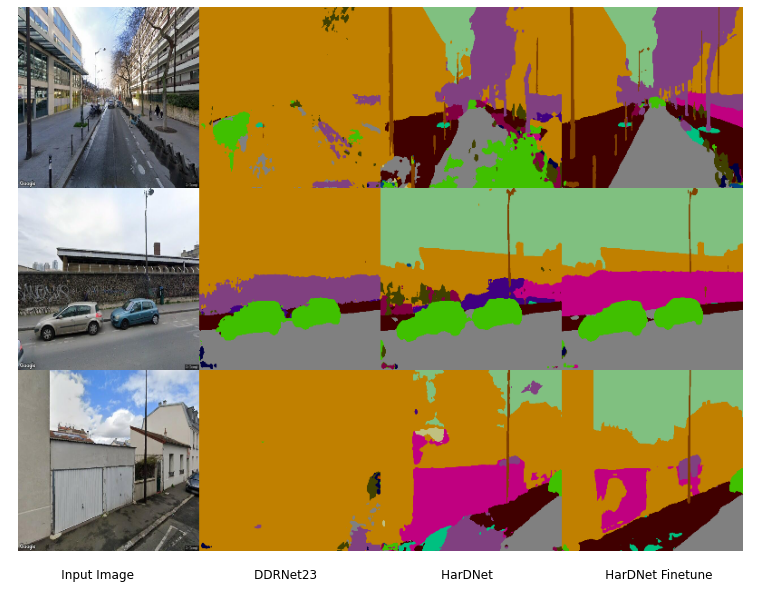

In [51]:
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

# axs[0].imshow(res_images_g[0])
axs[0].imshow(res_images_g[1])
axs[1].imshow(res_images_g[2])
# axs[3].imshow(res_images_g[3])
axs[2].imshow(res_images_g[4])
# axs[5].imshow(res_images_g[5])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.axis('off')
    ax.label_outer()

st = 'Input Image DDRNet23 HarDNet HarDNet Finetune'
subt = 'Input Image'.center(40) + 'DDRNet23'.center(40) + 'HarDNet'.center(40) + 'HarDNet Finetune'.center(40)
# fig.suptitle('k' * 104, y=0.1, x=0.515)
fig.suptitle(subt, y=0.1, x=0.515)

In [52]:
fig.savefig("google_all_subt.png", bbox_inches='tight')

In [69]:
path = '/Users/ruslanomarov/screenshots/reconstruction_results/'

ls = os.listdir(path)

In [71]:
ls.pop(0)

'.DS_Store'

In [72]:
ls.sort()
ls

['0.png', '2.png', '3.png', '4.png', '5.png']

In [79]:
imgs = [cv2.resize(cv2.cvtColor(cv2.imread(path + item), cv2.COLOR_RGB2BGR), (300, 300)) for item in ls]
imgs.insert(0, cv2.resize(cv2.cvtColor(cv2.imread('/Users/ruslanomarov/work/plane_reconstructor/test_corner2.jpg'), cv2.COLOR_RGB2BGR), (300, 300)))

In [81]:
ans = [np.hstack(imgs[:3]), np.hstack(imgs[3:])]

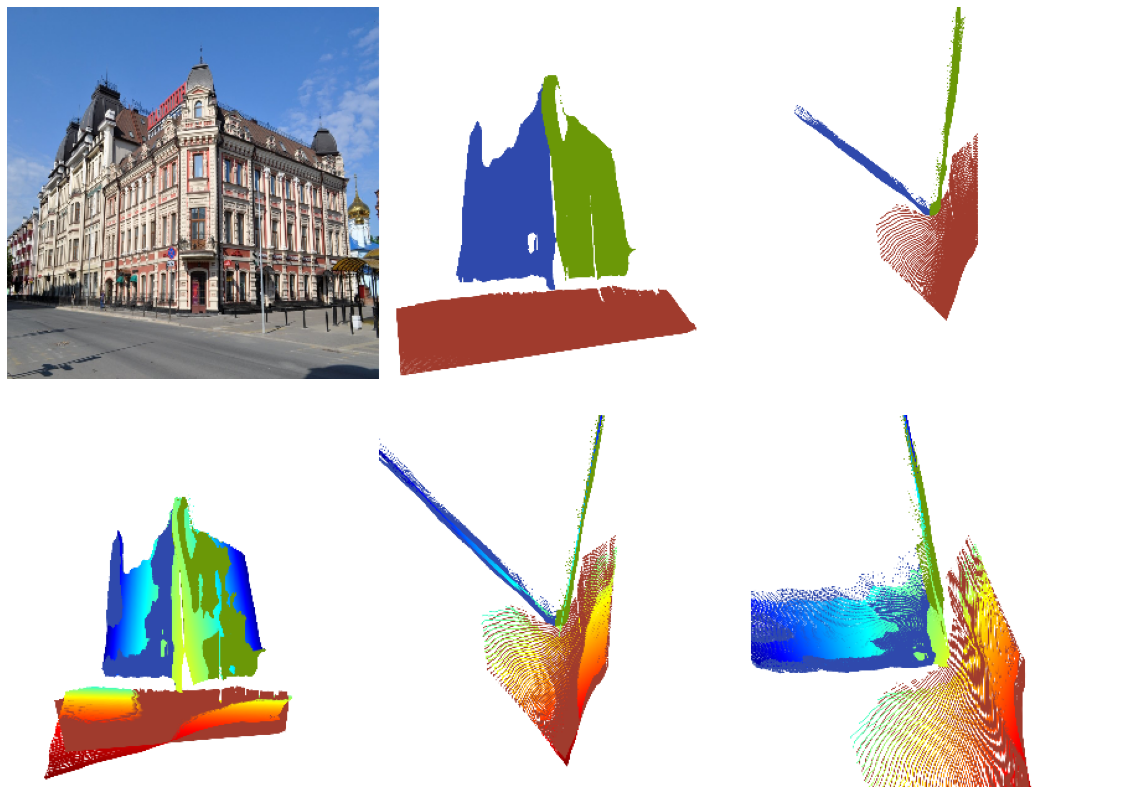

In [82]:
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(2, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)

axs[0].imshow(ans[0])
axs[1].imshow(ans[1])

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
    ax.axis('off')

In [83]:
fig.savefig("/Users/ruslanomarov/work/plane_reconstructor/reconstruction_result.png", bbox_inches='tight')